## Задание
<b> Уменьшить количество цветов в изображении при помощи квантования методами: </b> <br>
а) Уменьшение градаций серого <br>
б) Дизеринг Флойда-Стейнберга

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show();

img = cv2.cvtColor(cv2.imread('pictures/bliss.jpg'), cv2.COLOR_BGR2RGB)

### а) Уменьшение градаций серого квантованием <br>
Процесс разбиения непрерывного динамического диапазона значений яркости на ряд дискретных уровней называется квантованием. Число уровней квантования равно
$ K = [A / \Delta A] $,
где А определяет диапазон значений яркостей функции f (x, y), ΔA – величина кванта, для удобства полагаем, что ее значение равно единице.

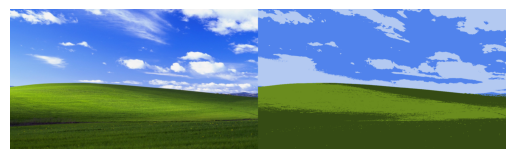

In [2]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Z = img.reshape((-1, 3))
Z = np.float32(Z) 

crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 4
ret, label, center = cv2.kmeans(Z, k, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

result = np.hstack((img, res2))

plt.axis("off")
imgshow(result)

### б) Алгоритм дизеринга Флойда-Стейнберга <br>
Дизеринг (сглаживание) Флойда-Стейнберга - это метод уменьшения цветовой палитры изображения (например, для уменьшения размера его файла) при сохранении как можно большей воспринимаемой детализации. Для каждого пикселя в исходном изображении из ограниченной палитры выбирается ближайший к этому пикселю цвет, и любая "ошибка" (разница в значении цвета пикселя, оригинал - новый) распределяется по соседним пикселям следующим образом:
$$
\begin{bmatrix}
0 & 0 & 0\\ 
0 & * & \frac{7}{16}\\ 
\frac{3}{16} & \frac{5}{16} & \frac{1}{16}
\end{bmatrix}
$$
, где * - рассматриваемый пиксель, а ошибка = фактическое значение пикселя - значение ближайшего цвета в палитре.


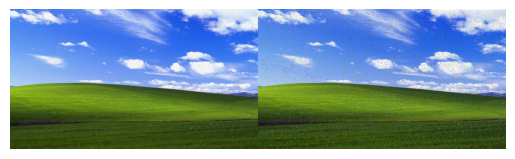

In [3]:
# Алгоритм Floyd-Steinberg
def dither(img):
    output = np.copy(img)
    height, width = img.shape[0], img.shape[1]
    # Идем по пикселям (длина, ширина)
    for y in range(1, height-1):
        for x in range(1, width-1):
            # Рассматриваемый пиксель
            pixel = output[y][x]
            new_pixel = round(pixel/255) * 255
            # Считаем ошибку
            error = pixel - new_pixel
            output[y][x] = new_pixel
            # Заполняем соседние пиксели
            output[y    ][x + 1] += error * 7/16
            output[y + 1][x - 1] += error * 3/16
            output[y + 1][x    ] += error * 5/16
            output[y + 1][x + 1] += error * 1/16
    return(output)

# Копируем изображение
img_original = img.copy()
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Отдельно берем каждый канал и прогоняем через алгоритм
blue = img[:,:,0]
blue = dither(blue)
green = img[:,:,1]
green = dither(green)
red = img[:,:,2]
red = dither(red)

# Совмещаем все каналы в одно изображение
img2 = cv2.merge((blue, green, red))

res = np.hstack((img_original, img2))
cv2.imwrite('pictures/dithered.jpg', img2)
imgshow(res)